In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CZ4041 Machine Learning Project/Colab

/content/drive/.shortcut-targets-by-id/1ldppAeVJfaoI4cvwZyTCju9jXbD4LI-H/CZ4041 Machine Learning Project/Colab


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
mpl.rcParams['figure.figsize'] = [15,5]
#plt.style.use('dark_background')

In [ ]:
data=pd.read_csv('data/train.csv',parse_dates=['date'],index_col=['date'])

In [ ]:
data

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,10,50,63
2017-12-28,10,50,59
2017-12-29,10,50,74


In [ ]:
def expand_df(df):
    data = df.copy()
    data['day'] = data.index.day
    data['month'] = data.index.month
    data['year'] = data.index.year
    data['dayofweek'] = data.index.dayofweek
    data['dayofyear']=data.index.dayofyear
    data['weekofyear']=data.index.weekofyear
    return data

In [ ]:
data=expand_df(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [ ]:
data

,store,item,sales,day,month,year,dayofweek,dayofyear,weekofyear
date,,,,,,,,,
2013-01-01,1,1,13,1,1,2013,1,1,1
2013-01-02,1,1,11,2,1,2013,2,2,1
2013-01-03,1,1,14,3,1,2013,3,3,1
2013-01-04,1,1,13,4,1,2013,4,4,1
2013-01-05,1,1,10,5,1,2013,5,5,1
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,27,12,2017,2,361,52
2017-12-28,10,50,59,28,12,2017,3,362,52
2017-12-29,10,50,74,29,12,2017,4,363,52


In [ ]:
AggregateDataStore=data.groupby(['store'])

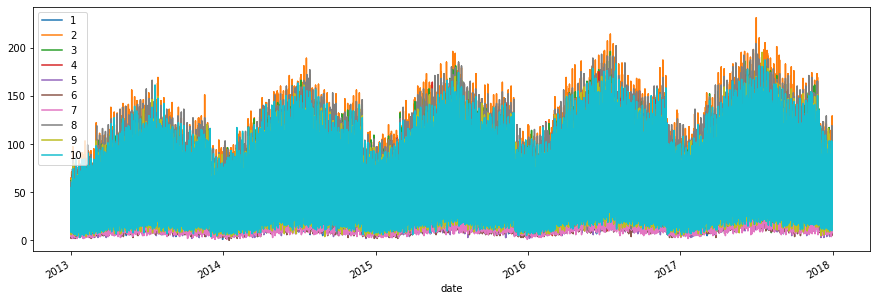

In [ ]:
AggregateDataStore.sales.plot()
plt.legend()

# Grouping Data by Year | Month | Day

In [ ]:
AggregateYearly =  data.groupby(['year','store'])[['sales']].mean()
AggregateMonthly=  data.groupby(['month','store'])[['sales']].mean()
AggregateWeekly =  data.groupby(['dayofweek','store'])[['sales']].mean()

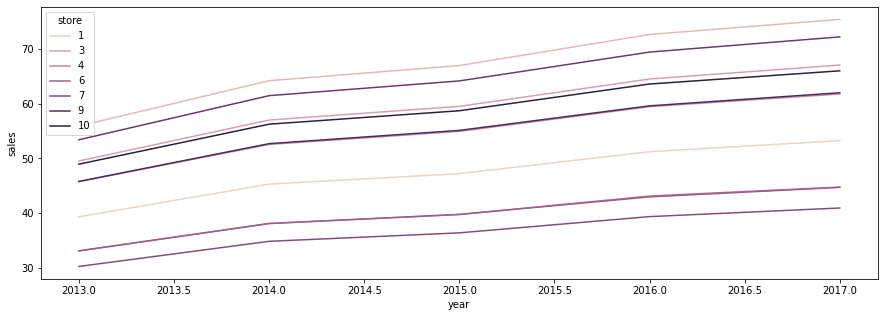

In [ ]:
sb.lineplot(x="year", y="sales", hue="store",data=AggregateYearly.reset_index())

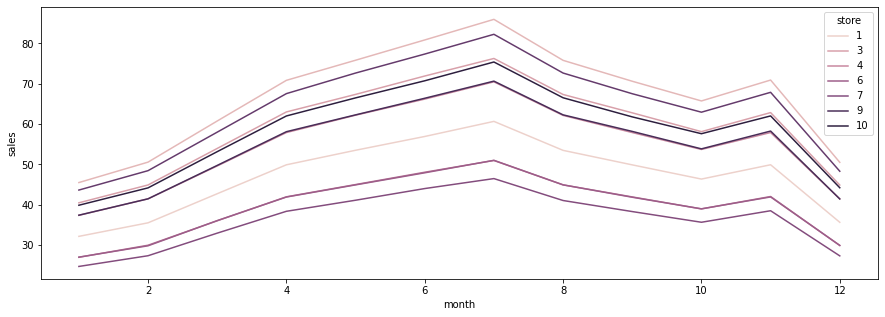

In [ ]:
sb.lineplot(x="month", y="sales", hue="store",data=AggregateMonthly.reset_index())

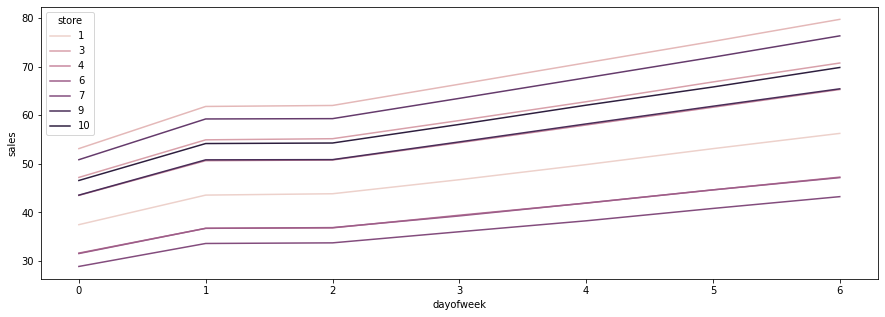

In [ ]:
sb.lineplot(x="dayofweek", y="sales", hue="store",data=AggregateWeekly.reset_index())

In [ ]:
AggregateStoreItem=data.groupby(['store','item'])[['sales']].mean()


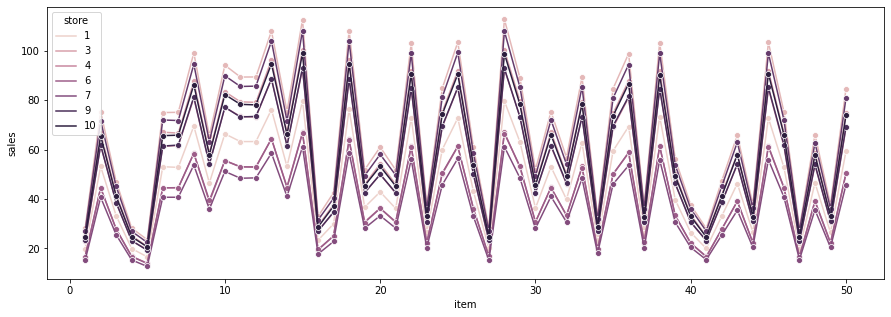

In [ ]:
sb.lineplot(x="item", y="sales", hue="store",data=AggregateStoreItem.reset_index(),marker='o') 

item - sales relationship has a discernible pattern and therfore predicting item/sales for one store can be used for subsequent stores with a constant bias

# Identifying relationships between columns

In [ ]:
agg_dayMonth = pd.pivot_table(data, index='dayofweek', columns='month',
                               values='sales', aggfunc=np.mean)
agg_monthYear = pd.pivot_table(data, index='month', columns='year',
                               values='sales', aggfunc=np.mean)
agg_dayYear = pd.pivot_table(data, index='year', columns='dayofweek',
                               values='sales', aggfunc=np.mean)

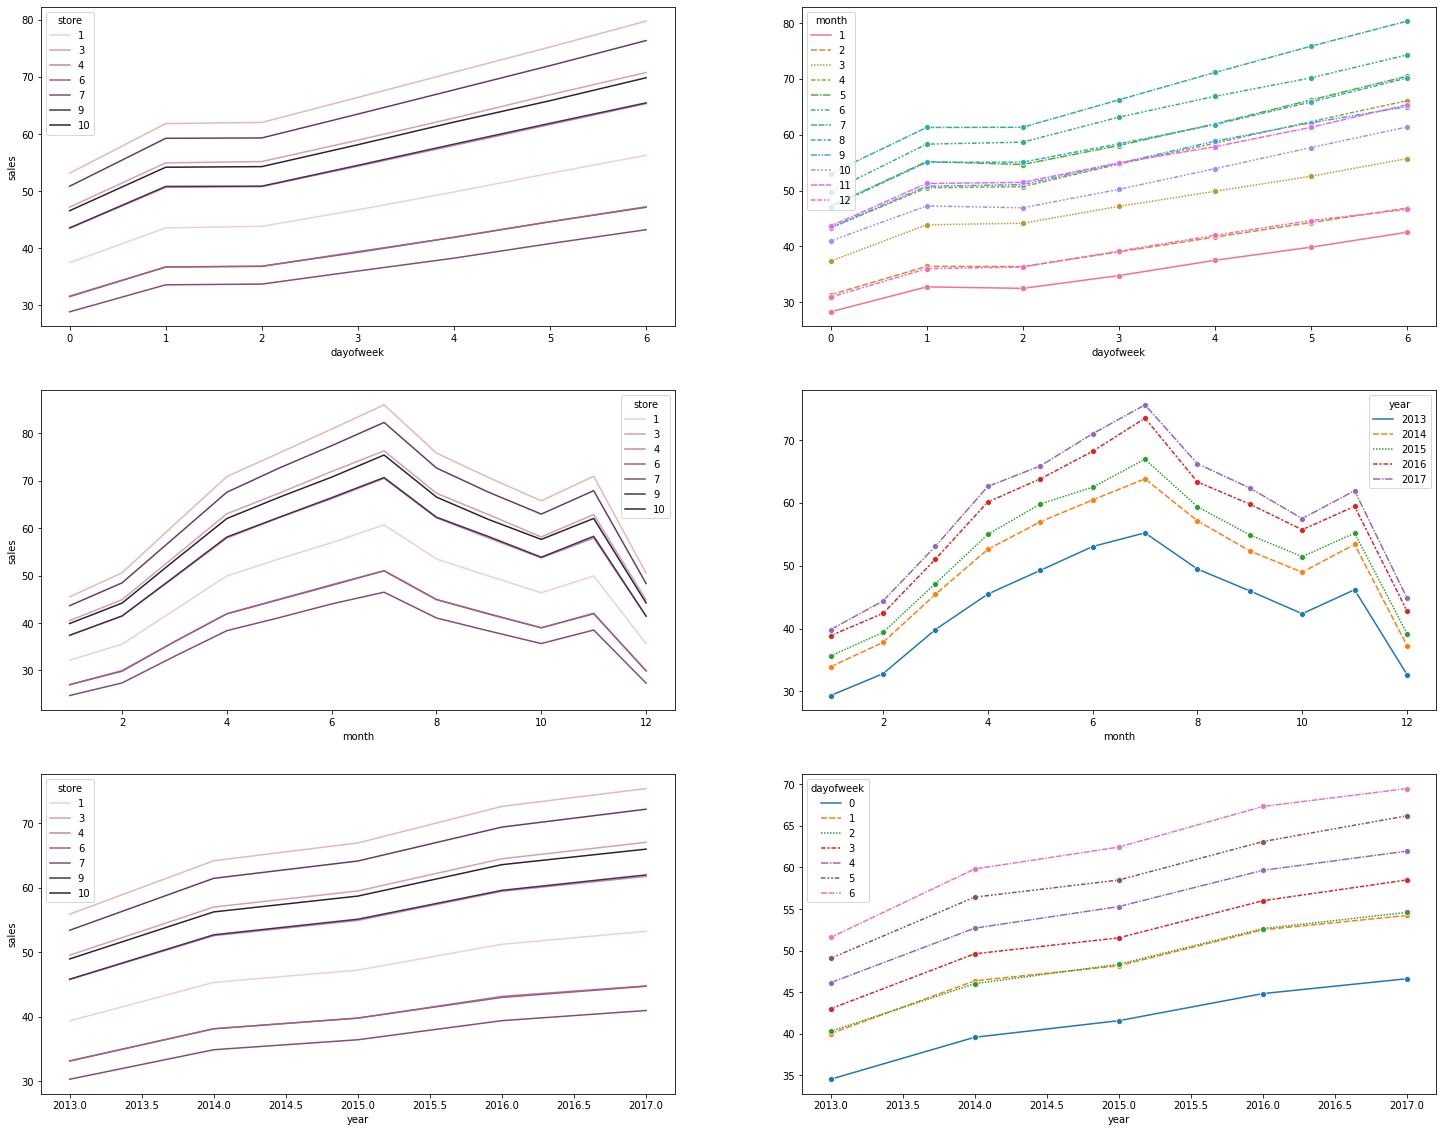

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(25,20))

sb.lineplot(x="dayofweek", y="sales", hue="store",data=AggregateWeekly.reset_index(),ax=ax[0,0])
sb.lineplot(data=agg_dayMonth,marker='o',ax=ax[0,1]) 

sb.lineplot(x="month", y="sales", hue="store",data=AggregateMonthly.reset_index(),ax=ax[1,0])
sb.lineplot(data=agg_monthYear,marker='o',ax=ax[1,1]) 

sb.lineplot(x="year", y="sales", hue="store",data=AggregateYearly.reset_index(),ax=ax[2,0])
sb.lineplot(data=agg_dayYear,marker='o',ax=ax[2,1]) 

In [ ]:
data.corr()

,store,item,sales,day,month,year,dayofweek,dayofyear,weekofyear
store,1.000000e+00,0.000000e+00,-0.008170,3.695084e-21,2.519747e-18,0.000000,-3.388062e-20,2.616170e-18,2.293411e-18
item,0.000000e+00,1.000000e+00,-0.055998,1.176735e-20,4.003432e-20,0.000000,-1.078961e-21,5.107300e-20,2.635434e-20
sales,-8.170361e-03,-5.599807e-02,1.000000,2.791264e-03,8.741417e-02,0.182360,2.226076e-01,8.634719e-02,8.474468e-02
day,3.695084e-21,1.176735e-20,0.002791,1.000000e+00,1.079604e-02,0.000584,7.725204e-04,9.404329e-02,6.626610e-02
month,2.519747e-18,4.003432e-20,0.087414,1.079604e-02,1.000000e+00,-0.000508,-1.475063e-03,9.965009e-01,9.692253e-01
year,0.000000e+00,0.000000e+00,0.182360,5.841665e-04,-5.080291e-04,1.000000,2.711688e-03,6.719189e-04,4.664350e-03
dayofweek,-3.388062e-20,-1.078961e-21,0.222608,7.725204e-04,-1.475063e-03,0.002712,1.000000e+00,-1.414220e-03,-1.397624e-03
dayofyear,2.616170e-18,5.107300e-20,0.086347,9.404329e-02,9.965009e-01,0.000672,-1.414220e-03,1.000000e+00,9.705337e-01
weekofyear,2.293411e-18,2.635434e-20,0.084745,6.626610e-02,9.692253e-01,0.004664,-1.397624e-03,9.705337e-01,1.000000e+00


In [ ]:
# monthly sales change based on year

In [ ]:
store = 10



sales    52.247905
dtype: float64

In [ ]:
Factor = 1.079843186922517
agg_monthYear[2014] = agg_monthYear[2014] / (Factor)
agg_monthYear[2015] = agg_monthYear[2015] / (Factor**2)
agg_monthYear[2016] = agg_monthYear[2016] / (Factor**3)
agg_monthYear[2017] = agg_monthYear[2017] / (Factor**4)

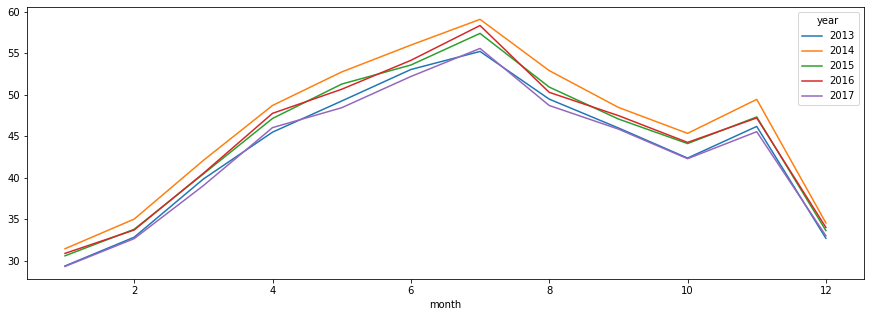

In [ ]:
agg_monthYear.plot()

,store,item,sales,day,month,year,dayofweek,dayofyear,weekofyear
date,,,,,,,,,
2013-01-01,10,1,14,1,1,2013,1,1,1
2013-01-02,10,1,14,2,1,2013,2,2,1
2013-01-03,10,1,16,3,1,2013,3,3,1
2013-01-04,10,1,17,4,1,2013,4,4,1
2013-01-05,10,1,12,5,1,2013,5,5,1
...,...,...,...,...,...,...,...,...,...
2017-12-27,10,50,63,27,12,2017,2,361,52
2017-12-28,10,50,59,28,12,2017,3,362,52
2017-12-29,10,50,74,29,12,2017,4,363,52


#Running Store Specific EDA

In [ ]:
store = 10

data_store = data[data['store'] == store].copy()

agg_dayMonth = pd.pivot_table(data_store, index='dayofweek', columns='month',
                               values='sales', aggfunc=np.mean)
agg_monthYear = pd.pivot_table(data_store, index='month', columns='year',
                               values='sales', aggfunc=np.mean)
agg_dayYear = pd.pivot_table(data_store, index='year', columns='dayofweek',
                               values='sales', aggfunc=np.mean)

In [ ]:
growth_rate = data_store.groupby('year').mean()[['sales']]
growth_rate

,sales
year,
2013,48.950575
2014,56.257918
2015,58.716000
2016,63.598470
2017,66.010082


In [ ]:
growth_rate.values.flatten()

array([48.95057534, 56.25791781, 58.716     , 63.59846995, 66.01008219])

In [ ]:
def func(value):
  x=value.copy()
  index=x[0]
  for i in range(len(x)):
    x[i] = (x[i] -  index)/x[i]
  return x
growth_factors = func(growth_rate.values.flatten())

In [ ]:
growth_factors=1+growth_factors

In [ ]:
agg_monthYear_growth = agg_monthYear.copy()

agg_monthYear_growth[2014] = agg_monthYear_growth[2014] / growth_factors[1]
agg_monthYear_growth[2015] = agg_monthYear_growth[2015] / growth_factors[2]
agg_monthYear_growth[2016] = agg_monthYear_growth[2016] / growth_factors[3]
agg_monthYear_growth[2017] = agg_monthYear_growth[2017] / growth_factors[4]

In [ ]:
AggregateMonthly=  data_store.groupby(['month'])[['sales']]

In [ ]:
AggregateMonthly.mean()

,sales
month,
1,39.885677
2,44.185816
3,53.158065
4,61.998933
5,66.478323
6,70.714933
7,75.368258
8,66.507226
9,61.771067


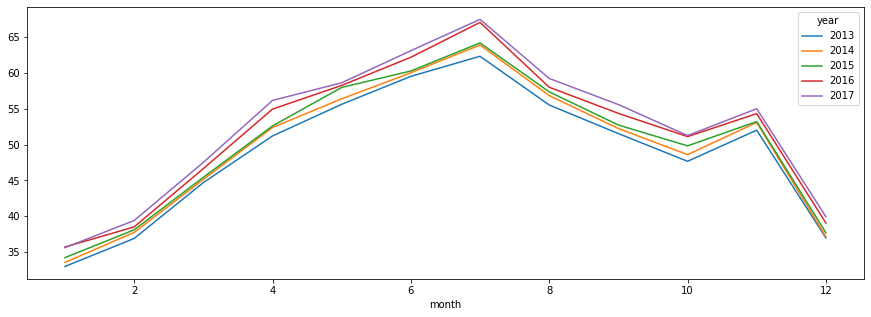

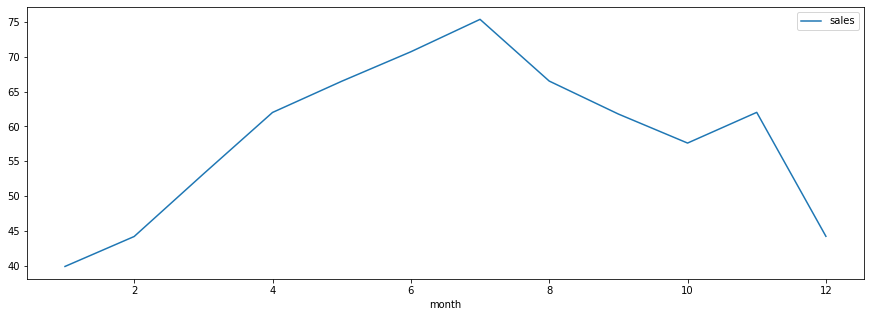

In [ ]:
agg_monthYear_growth.plot()
AggregateMonthly.mean().plot()

## Running a basic predictor

In [ ]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [ ]:
new_data=data[data['year'] > 2014].copy()

In [ ]:
grand_avg = new_data.sales.mean()

agg_dayTable = pd.pivot_table(new_data, index='dayofweek', columns='item', values='sales', aggfunc=np.mean)


# Month pattern
agg_monthTable = pd.pivot_table(new_data, index='month', values='sales', aggfunc=np.mean)
agg_monthTable.sales /= grand_avg

# Store pattern
agg_storeItemSales = pd.pivot_table(new_data, index='store', values='sales', aggfunc=np.mean)
agg_storeItemSales.sales /= grand_avg

agg_yearTable = pd.pivot_table(new_data, index='year', values='sales', aggfunc=np.mean)

sales
store month           
1     1      34.513333
      2      37.964706
      3      45.517849
      4      53.688000
      5      57.047957
...                ...
10    8      70.931183
      9      66.102889
      10     61.823441
      11     66.027556
      12     47.395054

[120 rows x 1 columns]

In [ ]:
YEARLY_GROWTH_FACTOR=1+np.mean(agg_yearTable.pct_change())

In [ ]:
#Best Score
def samplePredictor(test_data,debug=True):
  predicted_sales=[]

  for _, rows in test_data.iterrows():

    storeNumber = rows[0]
    itemNumber = rows[1]
    day=rows[5]
    month=rows[3]
    year=rows[4]

    baseSales = agg_dayTable.at[day,itemNumber]

    salesFactor = agg_storeItemSales.at[storeNumber, 'sales']
    monthFactor = agg_monthTable.at[month, 'sales']

    pred= baseSales * salesFactor * monthFactor *  1.079843186922517 #np.exp(1/10)

    predicted_sales.append(pred)
    if(debug): break

  if(debug):
    print("base sales {}".format(baseSales))
    print("sales Factor {}".format(salesFactor))
    print("month Factor {}".format(monthFactor))
    print("year Factor {}".format(np.exp(1/10)))
    print("result {}".format(pred))

  return predicted_sales


In [ ]:
#Using Aggregations worse

def samplePredictorNew(test_data,debug=True):
  predicted_sales=[]

  MONTH_WINDOW = 2
  DAY_WINDOW = 2

  grouped_weekly=new_data.groupby(['store','item','dayofweek'])[['sales']]
  grouped_monthly=new_data.groupby(['store','item','month'])[['sales']]

  for _, rows in test_data.iterrows():

    storeNumber = rows[0]
    itemNumber = rows[1]
    day=rows[5]
    month=rows[3]
    year=rows[4]
    
    
    dayFactor = grouped_weekly.get_group((storeNumber,itemNumber,day)).rolling(DAY_WINDOW).mean().mean().values[0]
    monthFactor = grouped_monthly.get_group((storeNumber,itemNumber,month)).rolling(MONTH_WINDOW).mean().mean().values[0]


    pred= np.mean([dayFactor,monthFactor]) *  1.079843186922517 #np.exp(1/10)

    predicted_sales.append(pred)
    if(debug): break

  if(debug):
    print("base sales {}".format(baseSales))
    print("sales Factor {}".format(salesFactor))
    print("month Factor {}".format(monthFactor))
    print("year Factor {}".format(np.exp(1/10)))
    print("result {}".format(pred))

  return predicted_sales

In [ ]:
def getTestData():
  sample_test_data=pd.read_csv('data/test.csv',parse_dates=['date'],index_col=['date'])
  sample_test_data=expand_df(sample_test_data)
  sample_test_data.drop('id',axis=1,inplace=True)
  return sample_test_data

In [ ]:
predictions=np.round(np.array(samplePredictorNew(getTestData(),debug=False)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [ ]:
predictions

array([17., 19., 19., ..., 82., 84., 86.])

## Auto parameter learning

In [ ]:
WINDOW_SIZE = 4

In [ ]:
[]
[m1,m2,m3]



# Testing new approaches

In [ ]:

store_list=[]

for index in range(1,11):
  store = index
  data_store = new_data[new_data['store'] == store]

  agg_itemTable=pd.pivot_table(data_store, index='item', values='sales', aggfunc=np.mean)

  agg_dayTable=pd.pivot_table(data_store, index='dayofweek', values='sales', aggfunc=np.mean)
  agg_monthTable=pd.pivot_table(data_store, index='month', values='sales', aggfunc=np.mean)

  agg_dayTable = agg_dayTable / np.mean(agg_dayTable)
  agg_monthTable = agg_monthTable / np.mean(agg_monthTable)

  YEARLY_GROWTH_RATE = (1+data_store.groupby('year').mean()[['sales']].pct_change()).mean()[0]

  store_list.append([agg_itemTable,agg_dayTable,agg_monthTable,YEARLY_GROWTH_RATE])

In [ ]:
def samplePredictor(test_data,debug=True):
  predicted_sales=[]

  for _, rows in test_data.iterrows():

    storeNumber = rows[0] - 1
    itemNumber = rows[1]
    day=rows[5]
    month=rows[3]
    year=rows[4]

    baseSales = store_list[storeNumber][0][store_list[storeNumber][0].index == itemNumber].values[0][0]

    dayFactor = store_list[storeNumber][1][store_list[storeNumber][1].index == day].values[0][0]

    monthFactor = store_list[storeNumber][2][store_list[storeNumber][2].index == month].values[0][0]

    YearFactor = store_list[storeNumber][3]

    pred= baseSales * dayFactor * monthFactor *  YearFactor

    predicted_sales.append(pred)
    if(debug): break

  if(debug):
    print("base sales {}".format(baseSales))
    print("sales Factor {}".format(salesFactor))
    print("month Factor {}".format(monthFactor))
    print("year Factor {}".format(np.exp(1/10)))
    print("result {}".format(pred))

  return predicted_sales

In [ ]:
predictions=np.round(np.array(samplePredictor(getTestData(),debug=False)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


In [ ]:
getTestData()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


,store,item,day,month,year,dayofweek,dayofyear,weekofyear
date,,,,,,,,
2018-01-01,1,1,1,1,2018,0,1,1
2018-01-02,1,1,2,1,2018,1,2,1
2018-01-03,1,1,3,1,2018,2,3,1
2018-01-04,1,1,4,1,2018,3,4,1
2018-01-05,1,1,5,1,2018,4,5,1
...,...,...,...,...,...,...,...,...
2018-03-27,10,50,27,3,2018,1,86,13
2018-03-28,10,50,28,3,2018,2,87,13
2018-03-29,10,50,29,3,2018,3,88,13


In [ ]:
predictions = list(map(int, predictions))

#Facebook prophet

## Comapring against Kaggle leaderboard Predictions

In [ ]:
leaderboardData = pd.read_csv("data/test_prediction_answer.csv")

In [ ]:
Comparision=leaderboardData[['sales']].copy()
Comparision['predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


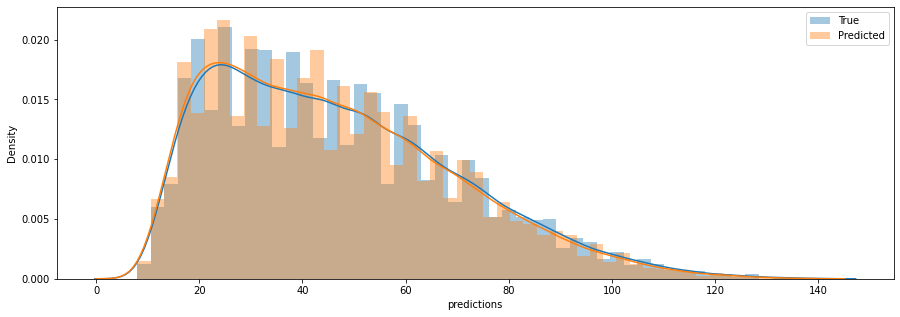

In [ ]:
sb.distplot(Comparision.sales,label='True')
sb.distplot(Comparision.predictions,label='Predicted')
plt.legend()

In [ ]:
(abs(Comparision.sales - Comparision.predictions)).mean()

0.768

In [ ]:
Comparision

,sales,predictions
0,12,12
1,15,14
2,15,15
3,15,15
4,17,16
...,...,...
44995,71,70
44996,72,70
44997,77,75
44998,81,80


In [ ]:
def createSubmission(predictions,fileName="data/submission.csv"):
  df=pd.DataFrame(predictions)
  df=df.reset_index()
  df.columns=['id','sales']
  df.to_csv(fileName,index=False)

In [1]:
createSubmission(predictions,fileName="data/submission9.csv")

NameError: ignored